# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
#print(cities)


Number of cities in the list: 630


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'q={city}&units=metric&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url, city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']["lat"]
        city_lng = city_weather['coord']["lon"]
        city_max_temp = city_weather['main']["temp_max"]
        city_humidity = city_weather['main']["humidity"]
        city_clouds = city_weather['clouds']["all"]
        city_wind = city_weather['wind']["speed"]
        city_country = city_weather['sys']["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | belle chasse


Processing Record 2 of Set 1 | bubaque
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | bodaybo
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | geraldton
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | chaman
Processing Record 9 of Set 1 | nantucket
Processing Record 10 of Set 1 | tual
Processing Record 11 of Set 1 | broome
Processing Record 12 of Set 1 | salalah
Processing Record 13 of Set 1 | buulobarde
Processing Record 14 of Set 1 | ilulissat
Processing Record 15 of Set 1 | zabol
Processing Record 16 of Set 1 | wanxian
Processing Record 17 of Set 1 | hadibu
Processing Record 18 of Set 1 | callao
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | alofi
Processing Record 22 of Set 1 | mermoz boabab
Processing Record 23 of Set 1 | doka
Processing Record 24 of Set 1 | ornskoldsvik
Processing Record 25 of Set 1 | ushuaia
Processing R

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,belle chasse,29.8549,-89.9906,31.99,72,40,4.12,US,1691635856
1,bubaque,11.2833,-15.8333,26.28,83,100,0.94,GW,1691635856
2,bilibino,68.0546,166.4372,16.84,42,96,3.57,RU,1691635856
3,bodaybo,57.8506,114.1933,25.19,55,100,1.17,RU,1691635857
4,tiksi,71.6872,128.8694,21.07,39,29,2.46,RU,1691635857


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,belle chasse,29.8549,-89.9906,31.99,72,40,4.12,US,1691635856
1,bubaque,11.2833,-15.8333,26.28,83,100,0.94,GW,1691635856
2,bilibino,68.0546,166.4372,16.84,42,96,3.57,RU,1691635856
3,bodaybo,57.8506,114.1933,25.19,55,100,1.17,RU,1691635857
4,tiksi,71.6872,128.8694,21.07,39,29,2.46,RU,1691635857


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

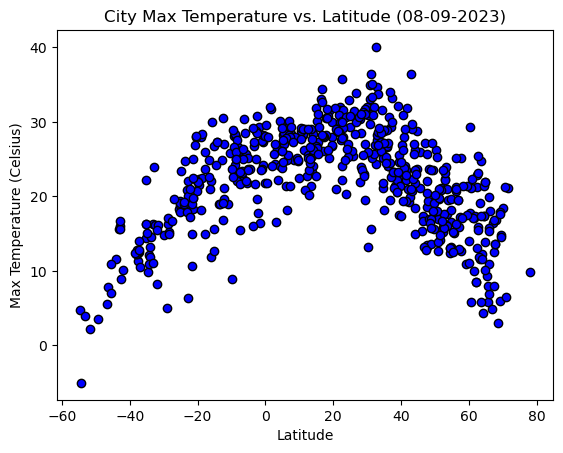

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Temperature vs. Latitude (08-09-2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")

# Save the figure
##plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

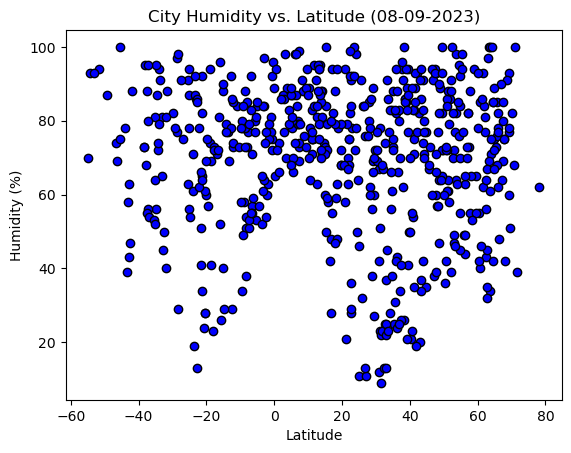

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Humidity vs. Latitude (08-09-2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

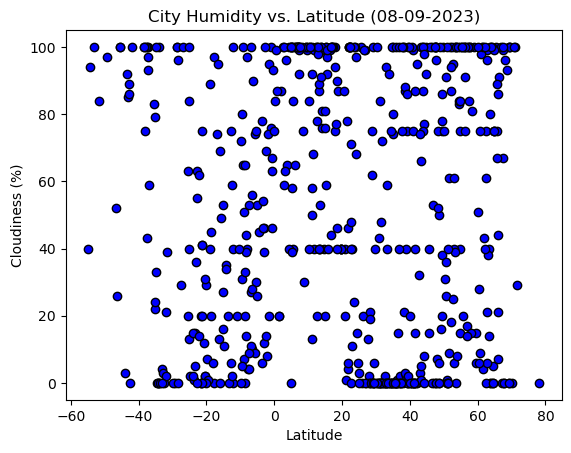

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Humidity vs. Latitude (08-09-2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

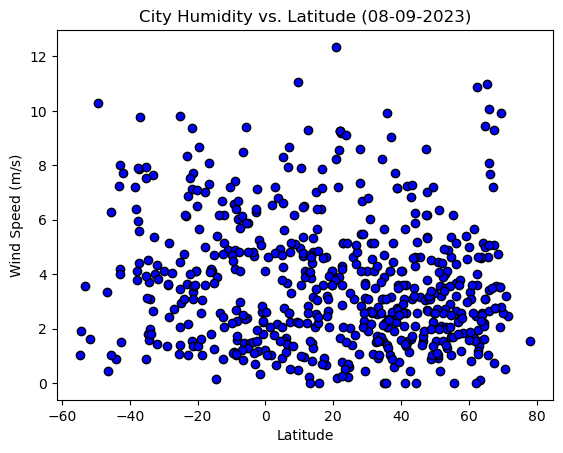

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Humidity vs. Latitude (08-09-2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def create_linear_reg_plot(x_values,y_values):
    # x_values = san_diego_housing['AveRooms']
    # y_values = san_diego_housing['MEDV']
    plt.scatter(x_values,y_values)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(10,5),fontsize=15,color="red")
    print(f"The r-value is: {rvalue}")


In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat'] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,belle chasse,29.8549,-89.9906,31.99,72,40,4.12,US,1691635856
1,bubaque,11.2833,-15.8333,26.28,83,100,0.94,GW,1691635856
2,bilibino,68.0546,166.4372,16.84,42,96,3.57,RU,1691635856
3,bodaybo,57.8506,114.1933,25.19,55,100,1.17,RU,1691635857
4,tiksi,71.6872,128.8694,21.07,39,29,2.46,RU,1691635857


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat'] <= 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,geraldton,-28.7667,114.6000,16.23,77,100,3.60,AU,1691635610
8,tual,-5.6667,132.7500,25.73,80,74,9.39,ID,1691635859
16,callao,-12.0667,-77.1500,21.16,73,100,5.14,PE,1691635862
17,hermanus,-34.4187,19.2345,12.11,72,0,3.72,ZA,1691635862
18,adamstown,-25.0660,-130.1015,19.33,56,84,9.81,PN,1691635863


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6709468760340334


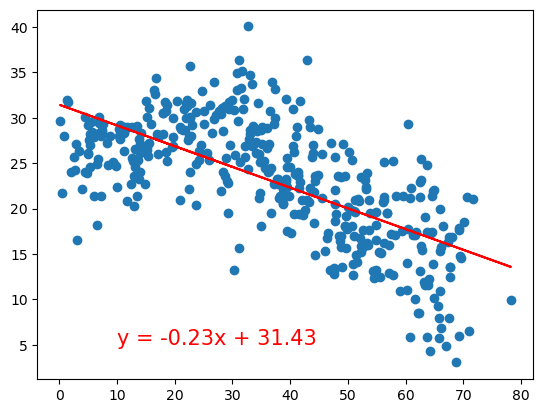

In [22]:
# Linear regression on Northern Hemisphere
x_val = northern_hemi_df['Lat']
y_val = northern_hemi_df['Max Temp']

create_linear_reg_plot(x_val, y_val)

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
# print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE
# print(f"The r-value is: {rvalue}")

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE
# print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE
# print(f"The r-value is: {rvalue}")

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE
# print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE
# print(f"The r-value is: {rvalue}")

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE
# print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE